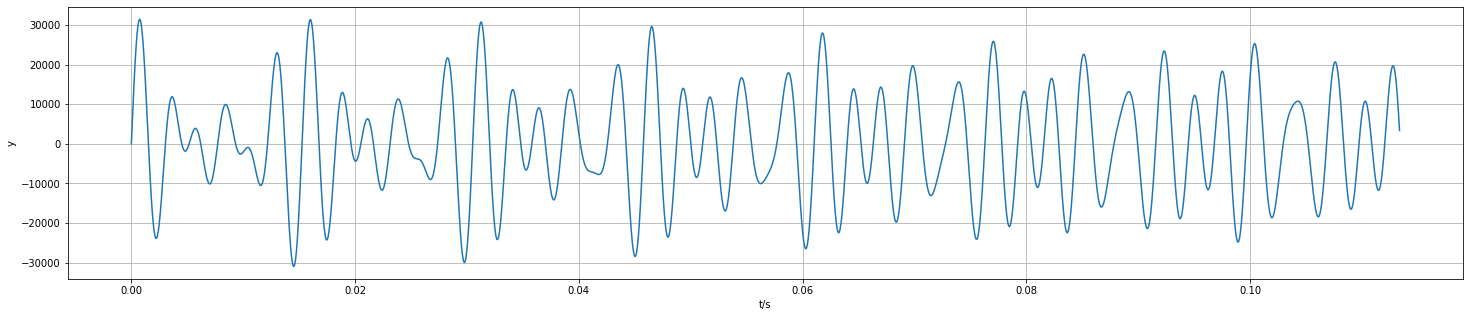

In [1]:
import wave, struct
import numpy
from WaveHelper import *
import matplotlib.pyplot as plt

time = 3
framerate = 44100

with wave.open('sound.wav', 'wb') as wf:
    wf.setnchannels(1)
    wf.setsampwidth(2)
    wf.setframerate(framerate)
    # s1 = sin_wave(1, c1, framerate, 0, time)
    s1 = sum(sin_wave(100, pitch, framerate, 0, time) for pitch in (c1, e1, g1))
    
    s1 = normalize_wave(s1, 0x7fff)
    s1 = s1.astype(np.int16)

    fig = plt.gcf()
    fig.set_size_inches(25, 5)
    plt.xlabel('t/s')
    plt.ylabel('y')
    plt.grid()
    x = np.arange(0, time, 1/framerate)
    plt.plot(x[0:5000], s1[:5000])

    for i in range(time * int(framerate)):
        wf.writeframesraw(struct.pack('<h', s1[i]))

# play the generated wave
Just use system mediaplayer.
Another way is to use pygame's mixer


In [ ]:
import os
os.system('sound.wav')